<a href="https://colab.research.google.com/github/AnaGutson/Organizacion-de-datos/blob/main/Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clasificadores basados en el margen, respecto del umbral**

## **Clasificador de Margen Máximo (Maximal Margin Classifier)**

Dado un conjunto de datos, se los distribuye, por cercanía, en dos grupos .

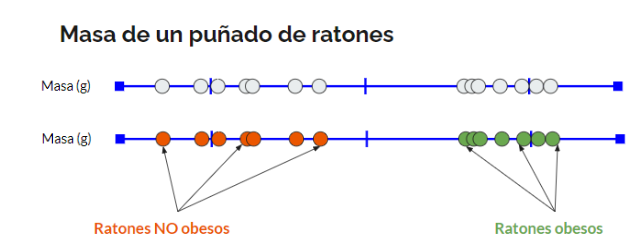

Se coloca un **umbral** entre ambos grupos, justo **a la mitad** de la distancia entre los dos extremos.

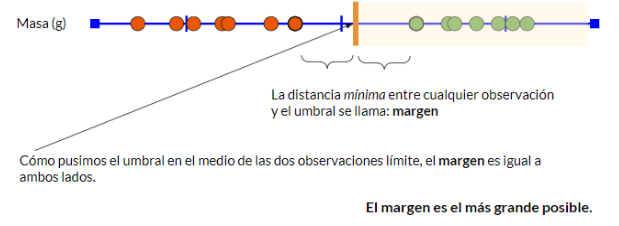

**Problemas.**

- El clasificador **no puede clasificar problemas que no son linealmente separables**.
- Además, es **super sensible a outliers**.

Si se tiene un conjunto con outliers, y se utiliza un modelo de Clasificador de Margen Máximo, el umbral va a quedar mal ubicado.

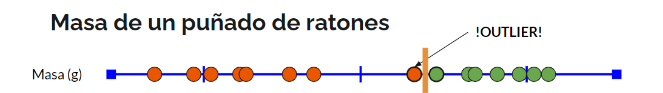

Si se tiene el siguiente valor, se lo estaría clasificando como ratón obeso.

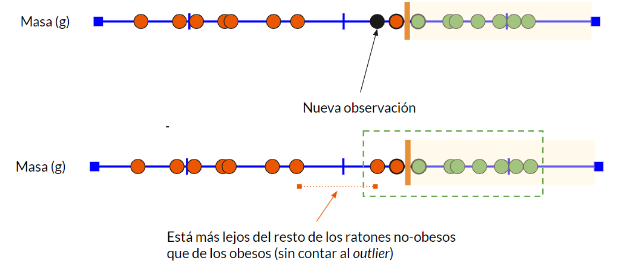

**Solución**.

Permitir clasificaciones erróneas.

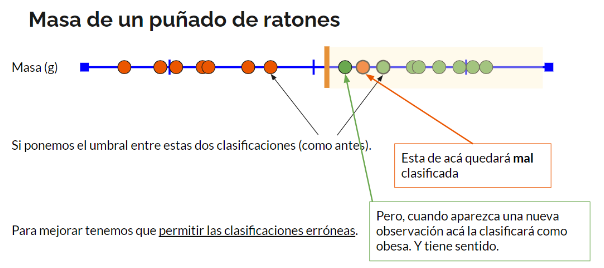

**Características**:

- Umbral poco sensible al conjunto de entrenamiento = higher bias.
- Desempeño bueno con nuevos datos = low variance.


## **Soft Margin Classifier - Support Vector Classifier**

Permite las **clasificaciones erróneas**.

$\quad \rightarrow$ **pueden manejar outliers**.

El clasificador **no puede clasificar problemas que no son linealmente separables**.

Toma un umbral entre dos valores: **Soft margin**.

El Soft margin, será calculado por el algoritmo que se use, utilizando validación cruzada.
- Partirá el conjunto en dos ($70% - 30%$, o a veces en $10$ subconjuntos). 
- Utilizará pares de observaciones similares para calcular la distancia media del umbral y validará la clasificación con el segundo conjunto.
- Como sabe de antemano que va a soportar clasificaciones erróneas, tendrá que definir cuántas soportará en su margen blando y cuantas observaciones. 


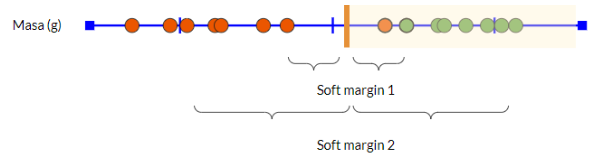

Se calcula el **mejor soft margin** para el conjunto de datos, con base en las observaciones erróneas y las correctamente clasificadas.

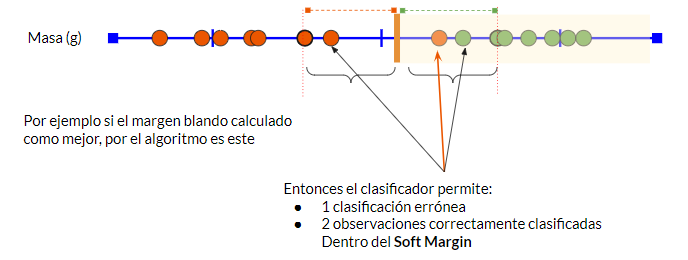

Las observaciones en los límites y dentro del Soft Margin, se llaman **Support Vectors** (o vectores suporte). 

Son vectores ya que son puntos en un espacio de dimensión $N$, en este caso $N=1$. Y soportan (o definen) el area llamada Soft Margin.

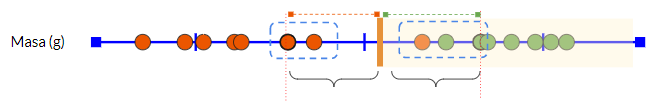

A medida que se aumentan las dimensiones del problema, aumentan las dimensiones del umbral.

- Si el problema es de $1$ dimensión (masa del ratón), el umbral es un punto.
- Si el problema es de $2$ dimensiones (masa y altura del ratón), el umbral es una recta.
- Si el problema es de $3$ dimensiones (masa, altura y edad del ratón), el umbral es un plano.
- Si el problema es de $4$ dimensiones (masa, altura, edad y presión del ratón), el umbral es un espacio.
- Y si el problema tiene $5$ dimensiones o más, el umbral será un hiperplano.

El **Support Vector Classifier** tendrá **una dimensión menos que los datos**.

Ejemplo con $2$ dimensiones:

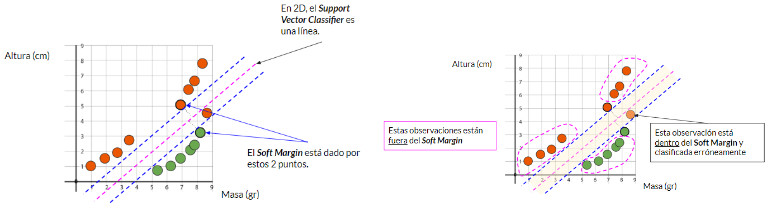

## **Support Vector Machine**

La idea es **llevar los datos a una dimensión mayor** para poder trabajarlos.

Es una técnica de **aprendizaje automático supervisado**.

Si bien originalmente fueron diseñadas para resolver problemas de clasificación binaria, en la actualidad se aplican para resolver problemas más complejos como los de regresión, agrupamiento y multiclasificación.

Entre los campos de aplicación más difundidos se pueden mencionar los siguientes:

* visión artificial.
* reconocimiento de caracteres.
* procesamiento de lenguaje natural.
* análisis de series temporales.



Las SVM se pueden incluir en la categoría de clasificadores lineales, puesto que una SVM construye un hiperplano o conjunto de hiperplanos en el espacio original cuando los conjuntos son linealmente separables o bien en el espacio transformado, denominado espacio de características aumentado, cuando los conjuntos no son linealmente separables.

**Normalización de datos.**

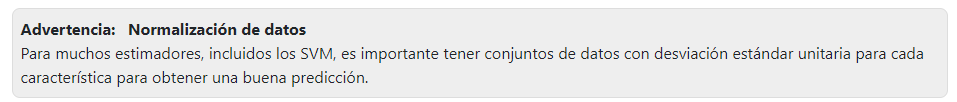

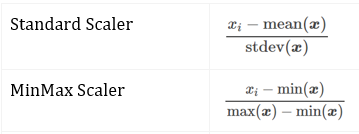

### **Pasos.**


- Se mapean los puntos de entrada a un espacio de características de una dimensión mayor; por ejemplo, si los puntos de entrada están en $R^2$ pueden ser mapeados a $R^3$.

- Se busca en la imagen de este mapeo un hiperplano que los separe y que maximice el margen entre las clases.

- La solución del hiperplano óptimo puede ser escrita como la combinación de unos pocos puntos de entrada que son llamados vectores soporte.

Es decir,

- Se empiezan con observaciones en una dimensión relativamente baja.
- Se llevan los datos a una dimensión mayor.
- Se encuentra un clasificador de tipo Support Vector que separe los datos en la alta dimensión en $2$ grupos.

### **Kernel**

El algoritmo detrás de Support Vector Machines, usa algo llamado **Funciones Kernel** que sistemáticamente **buscan clasificadores de tipo Support Vector Classifiers en dimensiones más altas**.

* Las SVM pueden definir un límite de decisión lineal o no lineal mediante el uso de funciones kernel. El uso de kernels abren la posibilidad de abordar problemas más complejos.

* Los datos son mapeados por medio de la transformación kernel o núcleo, a un espacio de dimensión mayor que el original en el cual se logra una mejor separación entre las clases. 

* Las SVM en realidad no calculan la transformación de cada observación en el espacio aumentado, en su lugar calculan el producto interno de las observaciones en el espacio aumentado que, computacionalmente, es mucho más barato.


#### **Kernel Lineal**

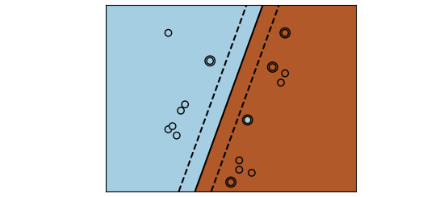

##### **Código**

**SVM con kernel LINEAL**

Hiperparametros:

* **C** : Parámetro de regularización, debe ser estrictamente positiva.

La fuerza de la regularización es inversamente proporcional a C
- un valor pequeño significa que el margen se calcula utilizando muchas o todas las observaciones alrededor de la línea de separación (más regularización).
- un valor grande significa que el margen se calcula sobre observaciones cercanas a la línea de separación (menos regularización).

In [ ]:
#Se crea un clasificador con kernel lineal y se entrena sobre los datos escalados min-max
clf = SVC(kernel='linear', C=5)
clf.fit(x_train_minmax, y_train)

#Se hace la predicción
y_pred_lin=clf.predict(x_test_minmax)

#### **Kernel Polinómico**

Este Kernel calcula, para cada cantidad de dimensiones ($1d$, $2d$, $3d$, $\dots$), las relaciones entre todas las observaciones y busca un clasificador que parta el conjunto en 2. Usando validación cruzada, en cada caso calcula el error y se queda con la mejor cantidad de dimensiones (el mejor $d$).

Los datos se trabajaran como $dato^{(n° dimensiones)}$.

Es decir, si las mejores relaciones se encuentran cuando el conjunto está en dos dimensiones, entonces los datos serán elevados al cuadrado.


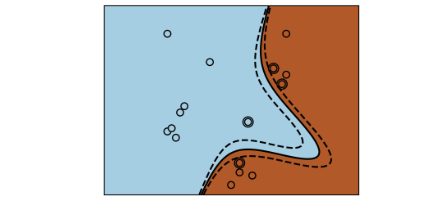

##### **Código**

**SVM con kernel POLINOMICO**

Hiperparámetros:

* **C**: Parámetro de regularización.

* **degree**: Grado de la función kernel polinomial ('poly'). Ignorado por todos los demás núcleos

* **gamma**: define cuánta influencia tiene un solo ejemplo de entrenamiento. Cuanto más grande es, más cerca deben estar otros ejemplos para verse afectados.

* **coef0** : se corresponde con el parámetro $r$ de la ecuación del kernel
$$K(a, b) =  (a \cdot b + r) ^ d$$ con $d$ el grado del polinomio.

La elección adecuada de C y gamma es fundamental para el rendimiento de la SVM. Se recomienda usar GridSearchCV con C y gamma espaciado exponencialmente para elegir buenos valores.

In [ ]:
#Se crea un clasificador con kernel polinómico y se entrena sobre los datos escalados min-max
clf = SVC(kernel='poly', C=5, degree=10, gamma=10, coef0=10)
clf.fit(x_train_minmax, y_train)

#Se hace la predicción
y_pred_pol=clf.predict(x_test_minmax)

#### **SVM Kernel Radial (Radial Basis Function Kernel)**

**Soporta $\infty$ dimensiones**.

Utiliza a las observaciones más cercanas (vecinas), para clasificar la nueva observación. Es decir, **funciona como un Nearest Neighbor model** (vecinos más cercanos) ponderado.



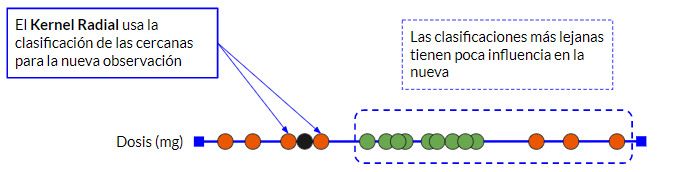

- Las Kernel Functions, sólo calculan la relación entre pares de observaciones como si estuviesen en otra dimensión, pero **no realizan una verdadera transformación del espacio**.
- **Reduce la cantidad de tiempo de cómputo necesario** ya que evita toda la matemática relacionada a la transformación del espacio.
- Permite que se realicen los cálculos del Kernel Radial en infinitas dimensiones.


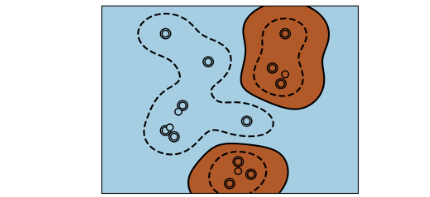

##### **Código**

**SVM con kernel RADIAL**

Hiperparámetros:

* **C**: Parámetro de regularización.

* **gamma**: define cuánta influencia tiene un solo ejemplo de entrenamiento. Cuanto más grande es, más cerca deben estar otros ejemplos para verse afectados

La elección adecuada de C y gamma es fundamental para el rendimiento de la SVM. Se recomienda usar GridSearchCV con C y gamma espaciado exponencialmente para elegir buenos valores.

In [ ]:
#Se crea un clasificador con kernel radial y se entrena sobre los datos escalados min-max
clf = SVC(kernel='rbf', C=5, gamma=10)
clf.fit(x_train_minmax, y_train)

#Se hace la predicción
y_pred_rad=clf.predict(x_test_minmax)

### **Vectores de Soporte**

Las máquinas de vectores de soporte también dibujan un margen alrededor del límite de decisión (un margen da más "confianza" en las predicciones). La posición del margen se define utilizando los vectores que están más cerca del límite de decisión: los vectores que se encuentran en la parte superior del margen son los vectores de soporte.

Las máquinas de vectores de soporte permiten cierta clasificación errónea durante el proceso de aprendizaje, para que puedan hacer un mejor trabajo al clasificar la mayoría de los vectores en el conjunto de prueba.

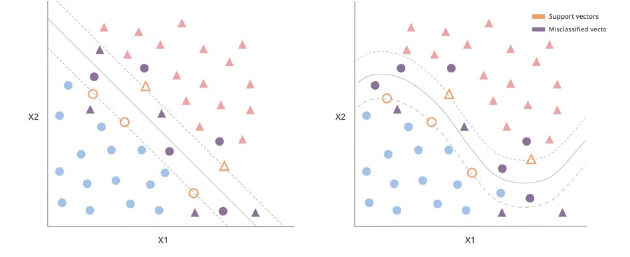

###**Ejemplo (Kernel Polinómico).**

Se tiene el siguiente conjunto de datos, tal que es imposible colocar un umbral que divida los datos sin presentar errores groseros de clasificación. 

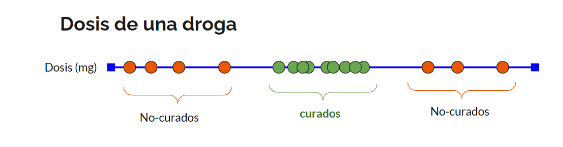

Entonces se elevan al cuadrado los datos:

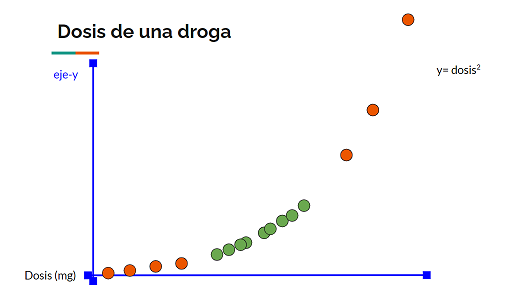

Y ahí se genera un **umbral** con Support Vector Classifier.

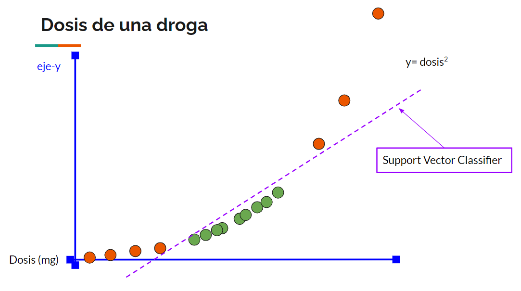

Para clasificar nuevos datos, se elevan al cuadrado. 

### **Código**

#### **SVM Básico**

In [ ]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC

In [ ]:
#Se crean conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(dataset[features].values, dataset[target].values, test_size=0.2, random_state=0)

#Se arma una version escalada con minmax (media=0 , var=1  )
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train) 
x_test_minmax  = min_max_scaler.fit_transform(x_test) 

#Se arma una version estandarizada
stand_scaler = preprocessing.StandardScaler()
x_train_norm = stand_scaler.fit_transform(x_train)
x_test_norm=stand_scaler.fit_transform(x_test)

#Se construye un modelo SVM  
svm = SVC()

#Se entrena con los datos sin escalar o escalados
svm.fit(x_train, y_train)
#svm.fit(x_train_minmax, y_train)
#svm.fit(x_train_norm, y_train)

#Se hace la prediccion
y_pred = svm.predict(x_test)
#y_pred = svm.predict(x_test_minmax)
#y_pred = svm.predict(x_test_norm)

#### **SVM + PCA**

Quiero reducir la dimensionalidad de los datos.

In [1]:
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
#Se crean conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(dataset[features].values, dataset[target].values, test_size=0.2, random_state=0)

#Se escalan los datos de entrenamiento
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)

Se analiza cómo reducir:

In [ ]:
# PCA sobre los datos escalados
pca = PCA(n_components = None)
pca.fit(x_train_scaled)

#Cantidad de Componentes
componentes = len(pca.explained_variance_ratio_) 

#Grafico la Varianza Explicada 
plt.plot(range(1,componentes+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Numero de componentes")
plt.ylabel("Varianza Explicada (%)")

Se entrena el SVM con las componentes vistas en el gráfico (se ve que con 6 se explica casi el 90% de la variabilidad).

In [ ]:
from sklearn.pipeline import Pipeline

#Se define el tipo de escalado, la transformacion PCA y el modelo
_sc = StandardScaler()
_pca = PCA(n_components = 6)
_model = SVC()

#Se crea un pipeline
svm_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('svm', _model)
])

#Se entrena sobre los datos que serán previamente escalados y transformados
svm_model.fit(x_train, y_train)

#Se hace la predicción
y_pred_pca = svm_model.predict(x_test)